# F1 Analysis

In [1]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1.1, rc={
    'figure.figsize': (25, 15),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#333333',
    'xtick.color': '#666666',
    'ytick.color': '#666666'
})
import pandas as pd
import numpy as np
plotting.setup_mpl()

# fastf1.Cache.enable_cache('path/to/folder/for/cache')  # optional but recommended

race = fastf1.get_session(2022, 'Miami Grand Prix', 'R')
race.load()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.4]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetch

In [2]:
timing_data = fastf1.api.timing_data(race.api_path)

api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...


In [3]:
drivers = race.drivers
drivers = [int(x) for x in drivers]

In [4]:
driver_names = race.laps.Driver.values
indexes = np.unique(race.laps.Driver.values, return_index=True)[1]
driver_names = [driver_names[index] for index in sorted(indexes)]
driver_dict = dict(zip(drivers, driver_names))

In [5]:
timing_df = timing_data[1].loc[timing_data[1].Position != 1]
timing_df

,Time,Driver,Position,GapToLeader,IntervalToPositionAhead
9,0 days 01:14:58.755000,16,2,LAP 9,LAP 9
10,0 days 01:14:58.794000,16,2,+0.038,+0.038
11,0 days 01:15:03.789000,16,2,+0.245,+0.245
12,0 days 01:15:08.221000,16,2,+0.411,+0.411
13,0 days 01:15:12.203000,16,2,+0.422,+0.422
...,...,...,...,...,...
25400,0 days 02:36:57.186000,31,9,+28.299,+1.461
25401,0 days 02:37:01.589000,31,9,+28.318,+1.329
25402,0 days 02:37:04.544000,31,9,+28.374,+1.275
25403,0 days 02:37:08.506000,31,9,+28.386,+1.258


In [6]:
teams = []
for i in race.laps.groupby(['Driver','Team']).count().index.values:
    teams.append(i[1])
teams = list(set(teams))
team_colors = []
for i in teams:
    if i == 'Haas F1 Team':
        team_colors.append([i, 'White'])

    if i == 'Williams':
        team_colors.append([i, 'Yellow'])

    if i == 'Aston Martin':
        team_colors.append([i, 'Green'])

    if i == 'Mercedes':
        team_colors.append([i, 'Cyan'])

    if i == 'AlphaTauri':
        team_colors.append([i, 'Grey'])

    if i == 'Red Bull Racing':
        team_colors.append([i, 'Blue'])

    if i == 'Alfa Romeo':
        team_colors.append([i, 'Brown'])

    if i == 'Ferrari':
        team_colors.append([i, 'Red'])

    if i == 'Alpine':
        team_colors.append([i, 'Magenta'])

    if i == 'McLaren':
        team_colors.append([i, 'Orange'])


Text(0, 0.5, 'Cumulative Delta (s) | Baseline = 95')

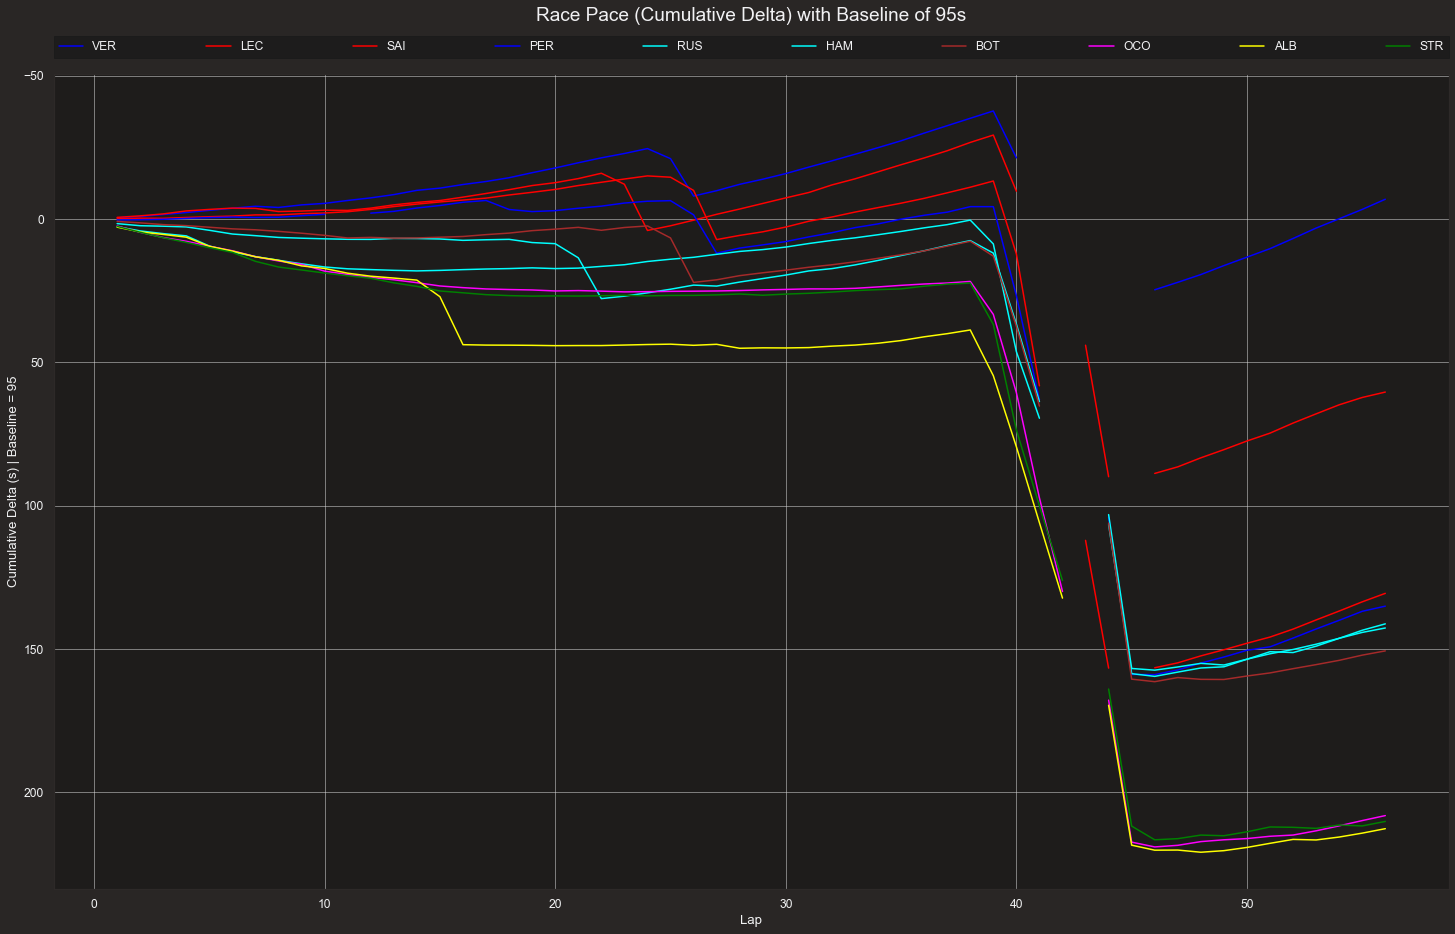

In [7]:
baseline = 95
for i in drivers[0:10]:
    if timing_data[0].loc[timing_data[0]['Driver'] == f'{i}']['LapTime'].empty:
        continue
    lap_times = timing_data[0].loc[timing_data[0]['Driver'] == f'{i}']['LapTime'].apply(lambda x: x / np.timedelta64(1, 's'))
    lap_times.name = driver_dict[i]
    team_name = ''
    team_color = ''
    for i in race.laps.groupby(['Driver','Team']).count().index.values:
        if lap_times.name in i:
            team_name = i[1]
    for i in team_colors:
        if team_name in i:
            team_color = i[1]
    (lap_times - baseline).reset_index(drop=True).cumsum().plot(color=team_color)
plt.gca().invert_yaxis()   
plt.legend(bbox_to_anchor=(0, 1.02, 1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=10)
plt.title(f'Race Pace (Cumulative Delta) with Baseline of {baseline}s', y=1.05)
plt.xlabel('Lap')
plt.ylabel(f'Cumulative Delta (s) | Baseline = {baseline}')

# Live Timing Client

In [8]:
from fastf1.livetiming.data import LiveTimingData

# fastf1.Cache.enable_cache('cache_directory')

livedata = LiveTimingData('saved_data.txt')
session = fastf1.get_testing_session(2022, 2, 2)
session.load(livedata=livedata)

core           INFO 	Loading data for Pre-Season Test - Practice 2 [v2.2.4]
data           INFO 	Reading live timing data from recording. This may take a bit.
core        WARNING 	Failed to load extended driver information!
core        WARNING 	Failed to load driver list and session results!
data           INFO 	Reading live timing data from recording. This may take a bit.
core        WARNING 	Failed to load lap data!
data           INFO 	Reading live timing data from recording. This may take a bit.
core        WARNING 	Failed to load telemetry data!
data           INFO 	Reading live timing data from recording. This may take a bit.
core        WARNING 	Failed to load weather data!
core           INFO 	Finished loading data for 0 drivers: []
